In [1]:
import seaborn as sns # gráficos + dataset IRIS
import matplotlib.pyplot as plt # gráficos
import plotly.express as px # gráficos 3d

In [2]:
# carregando base de dados
dados = sns.load_dataset('iris')

In [33]:
# visualização
dados.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# ver se há dados faltantes
dados.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
# estatística descritiva
dados.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# informações
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
# verificar a distribuição das classes
dados['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

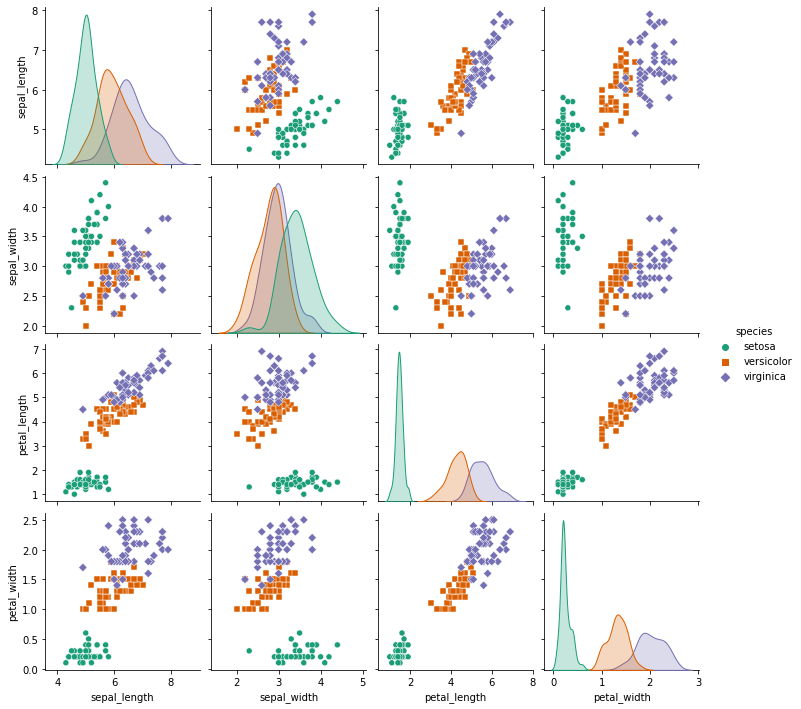

In [8]:
# relacionamentos em pares em um conjunto de dados.
sns.pairplot(dados, hue='species', markers=["o", "s", "D"], palette='Dark2')

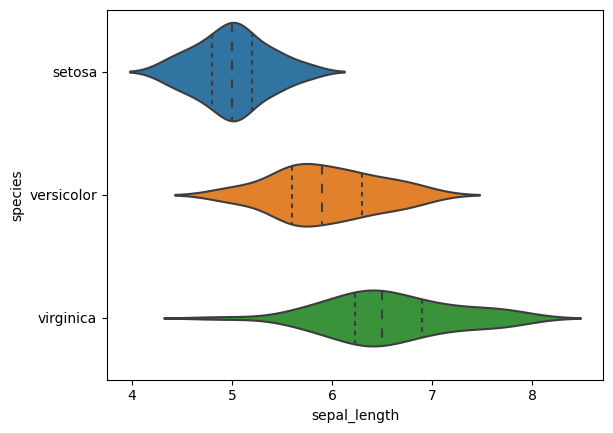

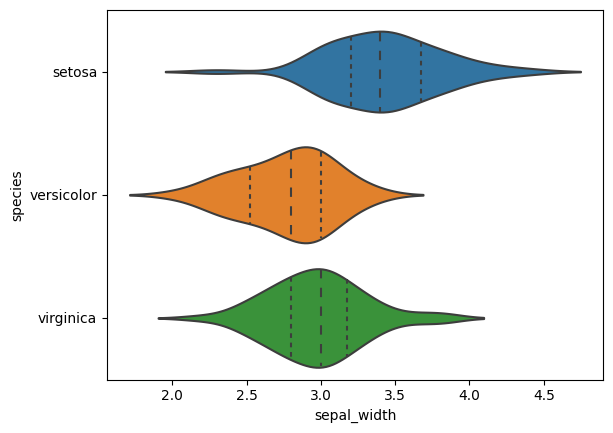

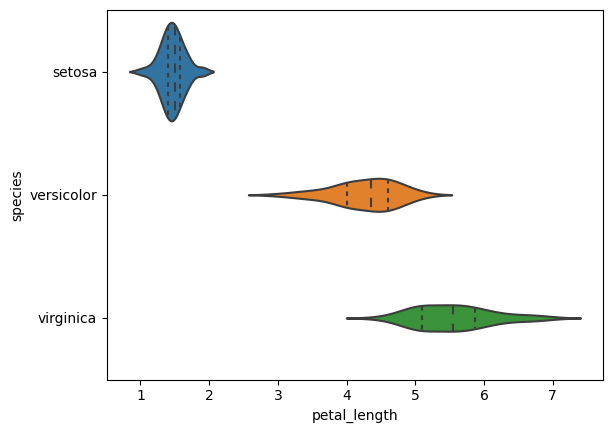

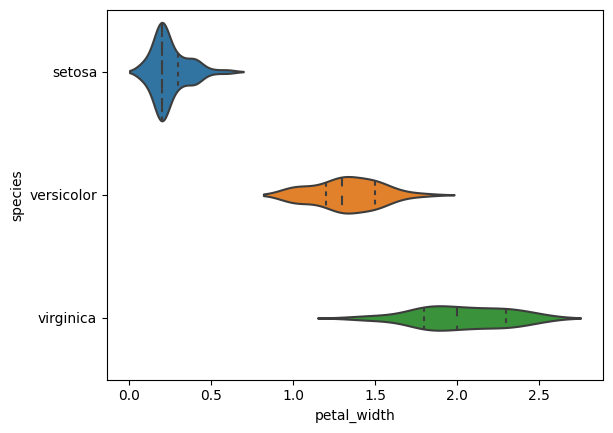

In [9]:
# boxplot (violino)
g = sns.violinplot(y='species', x='sepal_length', data=dados, inner='quartile')
plt.show()
g = sns.violinplot(y='species', x='sepal_width', data=dados, inner='quartile')
plt.show()
g = sns.violinplot(y='species', x='petal_length', data=dados, inner='quartile')
plt.show()
g = sns.violinplot(y='species', x='petal_width', data=dados, inner='quartile')
plt.show()

<AxesSubplot:title={'center':'Sepal (length VS width)'}, xlabel='sepal_length', ylabel='sepal_width'>

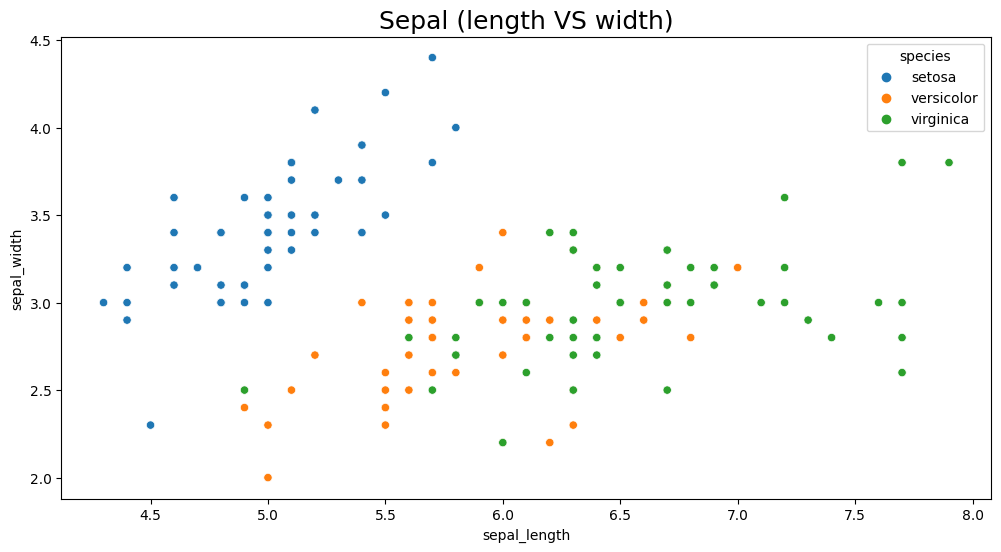

In [10]:
# gráfico de dispersão
ax = sns.scatterplot(x=dados['sepal_length'], y=dados['sepal_width'], hue=dados['species'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Sepal (length VS width)', fontsize=18)
ax

<AxesSubplot:title={'center':'Petal (length VS width)'}, xlabel='petal_length', ylabel='petal_width'>

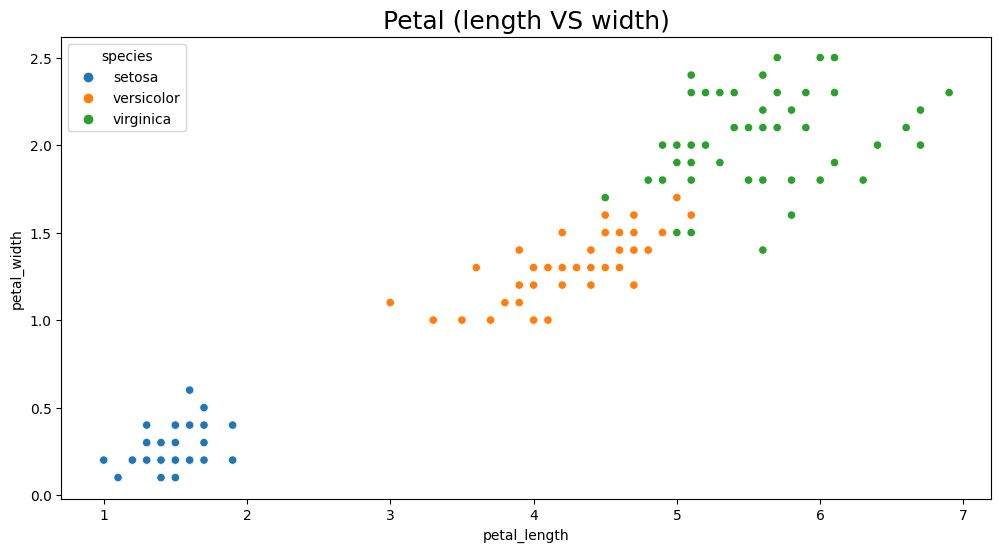

In [11]:
# gráfico de dispersão
ax = sns.scatterplot(x=dados['petal_length'], y=dados['petal_width'], hue=dados['species'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Petal (length VS width)', fontsize=18)
ax

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

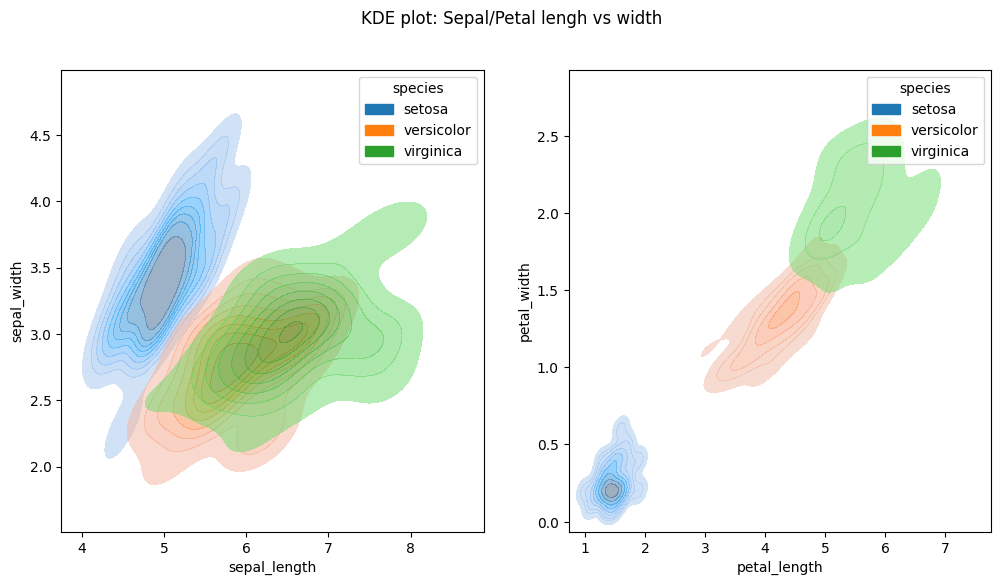

In [12]:
# Estimativa de densidade kernel (kde plot): Sepal/Petal lengh vs width
fig, axes = plt.subplots(1, 2, figsize=(12,6))
fig.suptitle('KDE plot: Sepal/Petal lengh vs width')
sns.kdeplot(ax=axes[0], data=dados, x='sepal_length', y='sepal_width', hue='species', fill=True, alpha=0.5)
sns.kdeplot(ax=axes[1], data=dados, x='petal_length', y='petal_width', hue='species', fill=True, alpha=0.5)

In [13]:
# gráfico 3d
fig = px.scatter_3d(dados, x='sepal_length', y='sepal_width', z='petal_width', color='species', height=600)
fig.update_layout(margin=dict(l=0, r=200, t=20, b=10))
fig.show()

## SVM

In [14]:
from sklearn import svm #Support Vector Machine
from sklearn.model_selection import train_test_split # separar os dados entre dados de treino e teste

In [15]:
# Separar os dados (X e Y)
X = dados.drop(['species'], axis=1)
y = dados.species

print('X = ' + str(X.shape) + '\n' + 'y = ' + str(y.shape))

X = (150, 4)
y = (150,)


In [16]:
# separar os dados entre dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=92)

In [17]:
# SVM regularization parameter
clf = svm.SVC(kernel='linear', C=1.0)

In [18]:
clf.fit(X_train, y_train) # modelar com os dados de treino

SVC(kernel='linear')

In [19]:
# previsão
clf.predict(X_test)
y_pred = clf.predict(X_test)

In [20]:
clf.score(X_test,y_test) # acurácia

0.9777777777777777

In [21]:
from sklearn.metrics import classification_report # matriz de confusão

In [22]:
print(classification_report(y_test, y_pred)) # matriz de confusão

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       1.00      0.92      0.96        13
   virginica       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



## KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier #K-Nearest Neighbors
from sklearn import metrics

In [24]:
# Separar os dados (X e Y)
X = dados.drop(['species'], axis=1)
y = dados.species

print('X = ' + str(X.shape) + '\n' + 'y = ' + str(y.shape))

X = (150, 4)
y = (150,)


In [25]:
# separar os dados entre dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=92)

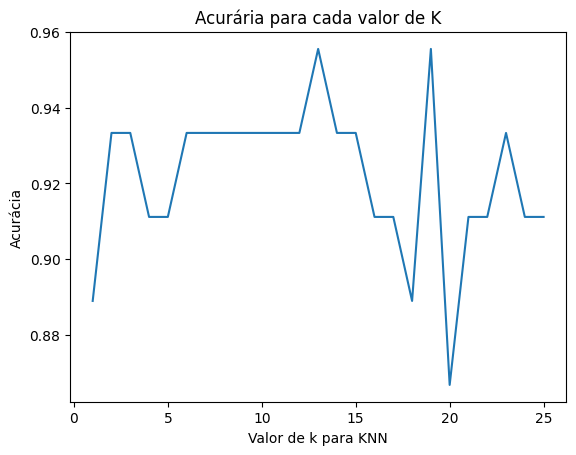

In [26]:
# experimentar diferentes valores para K
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Valor de k para KNN')
plt.ylabel('Acurácia')
plt.title('Acurária para cada valor de K')
plt.show()

In [27]:
# modelar com os dados de treino
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [28]:
y_pred = knn.predict(X_test) # previsão

In [29]:
metrics.accuracy_score(y_test, y_pred)  # acurácia

0.9555555555555556

In [30]:
print(classification_report(y_test, y_pred)) # matriz de confusão

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       0.92      0.92      0.92        13
   virginica       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

